In [1]:
# Import packages
from tools.to_read import *
from tools.to_plot import *
from tools.to_do import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.image as mpimg

# Set up
root='/home/jacoponudo/Documents/Size_effects/'
platforms = ['reddit',  'voat','usenet','gab', 'facebook','twitter']
localization_data = []

# Process each platform and store the results
for platform in tqdm(platforms):
    df = pd.read_parquet(root + 'DATA/' + platform + '/' + platform + '_raw_data.parquet', columns=columns_to_read[platform])
    df.columns = standard_columns
    df['date'] = pd.to_datetime(df['timestamp'])
    
    # Create a year-week column for grouping
    df['year'] = df['date'].dt.year
    df['week'] = df['date'].dt.isocalendar().week

    # Drop rows where date conversion failed
    df = df.dropna(subset=['year', 'week'])

    # Get unique years
    years_unique = df['year'].unique()

    for year in (years_unique):
        for week in range(1, 54):  # Loop through each week (ISO weeks range from 1 to 53)
            # Filter data for the specific year and week
            weekly_data = df[(df['year'] == year) & (df['week'] == week)]
            
            # Check if there are at least 100 rows in the weekly dataset
            if len(weekly_data) < 100:
                continue  # Skip this week if there are fewer than 100 rows
            
            # Group by user and post to count the occurrences of comments (or other interactions)
            counts = weekly_data.groupby(['user_id', 'post_id'])['date'].count().reset_index()
            
            # Calculate histogram for PDF
            hist, _ = np.histogram(counts['date'], bins=np.arange(1, 11, 1), density=True)
            
            # Calculate the Localization parameter L (replace with your actual calculation)
            localization_value = calculate_localization_parameter(hist)  # Ensure this function is defined
            alpha_value = calculate_alpha_parameter(hist)
            # Create a datetime object representing the start of the week for the x-axis
            start_of_week = (f'{int(year)}-W{week:02d}-1')  # ISO week date format
            localization_data.append({'Platform': platform, 
                                       'Date': start_of_week,  # Convert to datetime
                                       'Localization': localization_value,'Alpha':alpha_value, 'Platform': platform})
localization_df = pd.DataFrame(localization_data)
localization_df.to_csv(root+f'PAPER/output/3_section/boxplot_localization.csv', index=False)
# Save each platform's data to a separate CSV
for platform in localization_df['Platform'].unique():
    # Filter data for the specific platform
    platform_data = localization_df[localization_df['Platform'] == platform]
    platform_data.to_csv(root+f'PAPER/output/3_section/boxplot_localization_{platform}.csv', index=False)

/home/jacoponudo/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
100%|██████████| 6/6 [07:52<00:00, 78.75s/it] 


/tmp/ipykernel_235900/2937457250.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=df, x="Platform", y="Localization", kind="violin", inner=None, palette=palette,    height=d1, aspect=1.5)
/tmp/ipykernel_235900/2937457250.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df, x="Platform", y="Localization", palette=palette, size=2, ax=g.ax,alpha=0.1)
/home/jacoponudo/.local/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 13.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/jacoponudo/.local/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarn

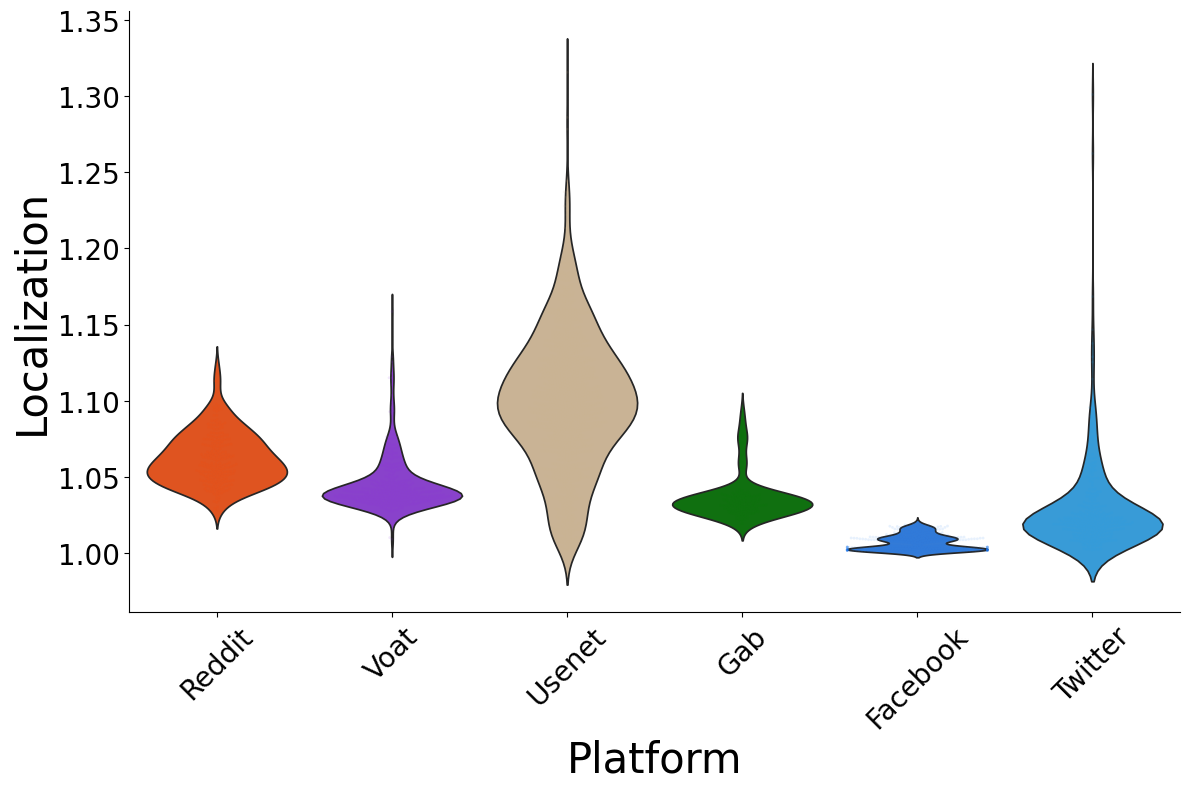

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(root + 'PAPER/output/3_section/boxplot_localization.csv')

# Order the platforms if needed (make sure 'platforms' is defined)
df['Platform'] = pd.Categorical(df['Platform'], categories=platforms, ordered=True)

# Create the violin plot using catplot
g = sns.catplot(data=df, x="Platform", y="Localization", kind="violin", inner=None, palette=palette,    height=d1, aspect=1.5)

# Add the swarmplot on top of the violin plot
sns.swarmplot(data=df, x="Platform", y="Localization", palette=palette, size=2, ax=g.ax,alpha=0.1)

# Customizing plot labels and title
plt.xlabel('Platform', fontsize=xl)
plt.ylabel('Localization', fontsize=yl)
plt.yticks(fontsize=t)

# Convert platform names to uppercase
plt.xticks(ticks=range(len(platforms)), labels=[platform.capitalize() for platform in platforms], rotation=45,fontsize=20)

# Remove the box around the plot
sns.despine()

plt.tight_layout()
combined_image_path = root + 'PAPER/output/3_section/3.png'
plt.savefig(combined_image_path)
plt.show()
